In [1]:
import pandas as pd
merged_ds =  pd.read_csv("data/final_population_health_merged.csv")

In [10]:
len(merged_ds)

51

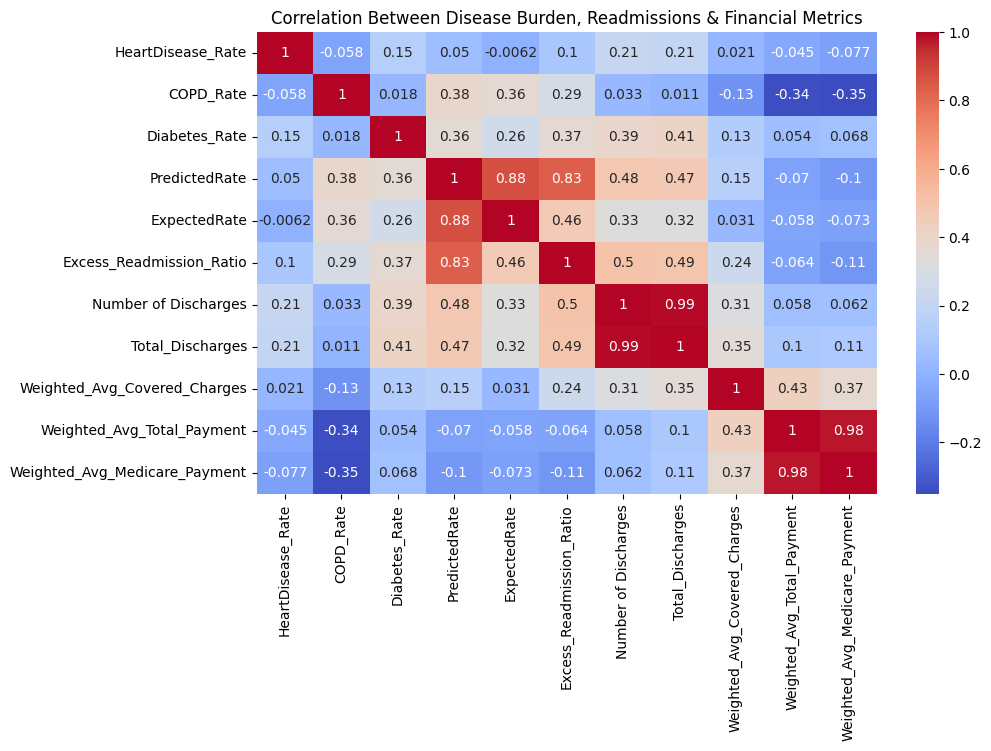

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = merged_ds.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Disease Burden, Readmissions & Financial Metrics")
plt.show()


In [3]:
# Fix unrealistic disease rates (values > 100 are likely per 100,000)
for col in ["HeartDisease_Rate", "COPD_Rate", "Diabetes_Rate"]:
    merged_ds[col] = merged_ds[col].apply(lambda x: x / 1000 if x > 100 else x)


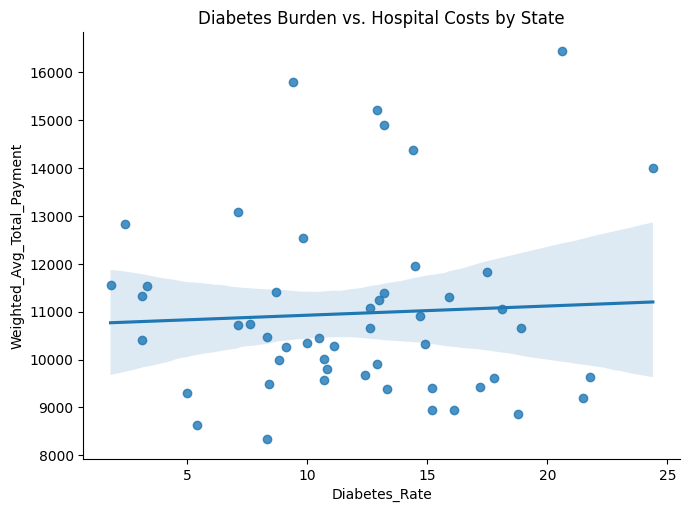

In [4]:
sns.lmplot(data=merged_ds, x="Diabetes_Rate", y="Weighted_Avg_Total_Payment", height=5, aspect=1.4)
plt.title("Diabetes Burden vs. Hospital Costs by State")
plt.show()


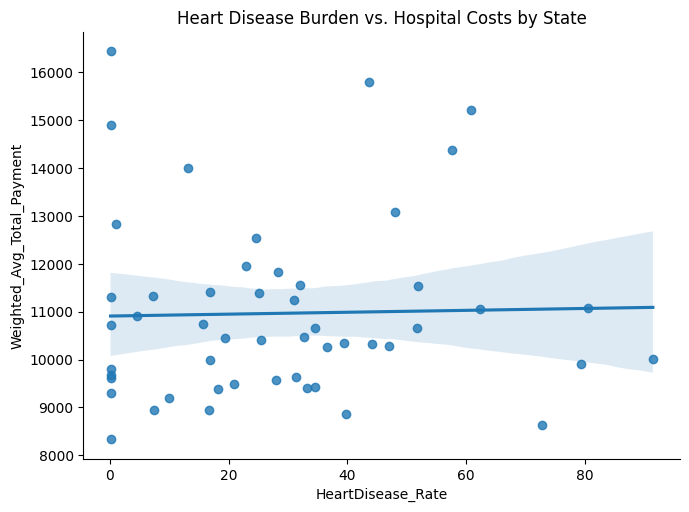

In [5]:
sns.lmplot(data=merged_ds, x="HeartDisease_Rate", y="Weighted_Avg_Total_Payment", height=5, aspect=1.4)
plt.title("Heart Disease Burden vs. Hospital Costs by State")
plt.show()


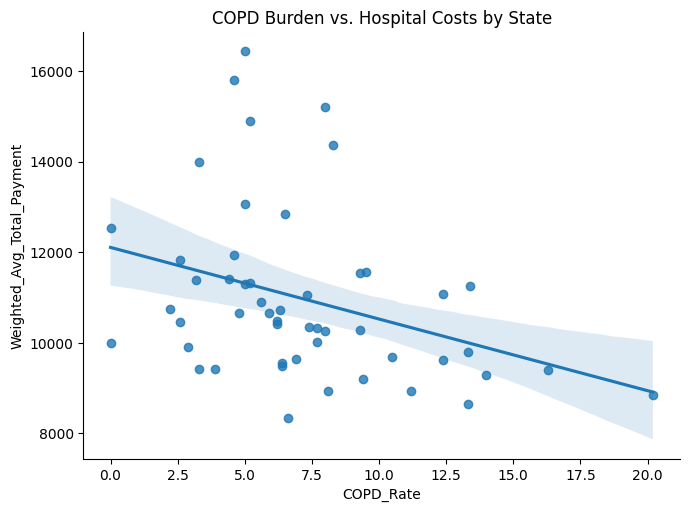

In [6]:
sns.lmplot(data=merged_ds, x="COPD_Rate", y="Weighted_Avg_Total_Payment", height=5, aspect=1.4)
plt.title("COPD Burden vs. Hospital Costs by State")
plt.show()


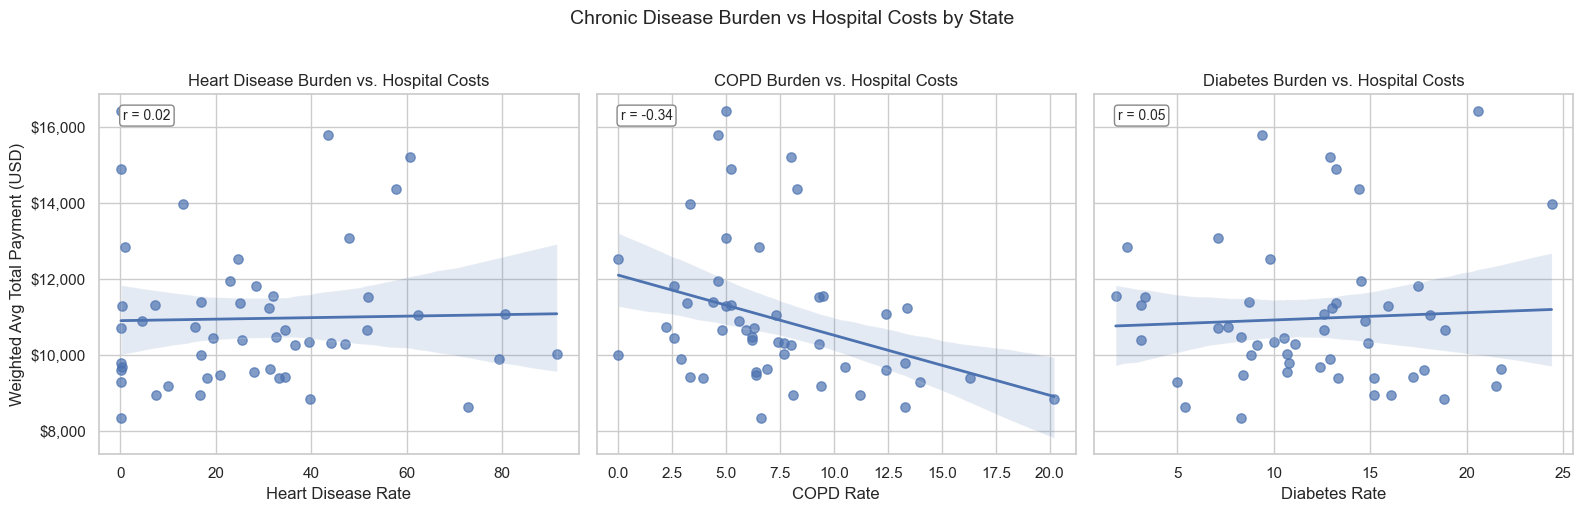

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

sns.set(style="whitegrid")

pairs = [
    ("HeartDisease_Rate", "Heart Disease"),
    ("COPD_Rate",         "COPD"),
    ("Diabetes_Rate",     "Diabetes"),
]

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

for ax, (xcol, title) in zip(axes, pairs):
    # scatter + trendline
    sns.regplot(
        data=merged_ds, x=xcol, y="Weighted_Avg_Total_Payment",
        ax=ax, scatter_kws={"alpha":0.7, "s":45}, line_kws={"lw":2}, ci=95
    )
    ax.set_title(f"{title} Burden vs. Hospital Costs", fontsize=12)
    ax.set_xlabel(f"{title} Rate")
    ax.set_ylabel("")  # shared on first subplot

    # annotate Pearson r
    r = merged_ds[[xcol, "Weighted_Avg_Total_Payment"]].corr(numeric_only=True).iloc[0,1]
    ax.text(0.05, 0.93, f"r = {r:.2f}", transform=ax.transAxes, fontsize=10,
            bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="#888"))

# nice y-axis formatting ($)
axes[0].set_ylabel("Weighted Avg Total Payment (USD)")
fmt = FuncFormatter(lambda v, p: f"${int(v):,}")
for ax in axes:
    ax.yaxis.set_major_formatter(fmt)

plt.suptitle("Chronic Disease Burden vs Hospital Costs by State", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


In [8]:
import plotly.express as px

long = merged_ds.melt(
    id_vars=["State","Weighted_Avg_Total_Payment"],
    value_vars=["HeartDisease_Rate","COPD_Rate","Diabetes_Rate"],
    var_name="Condition", value_name="Rate"
)

px.scatter(
    long, x="Rate", y="Weighted_Avg_Total_Payment",
    facet_col="Condition", trendline="ols", height=450, width=1000,
    title="Chronic Disease Burden vs Hospital Costs (by State)",
    hover_name="State"
).update_yaxes(tickprefix="$")


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('<b>%{hovertext}</b><br><br>Con' ... 'al_Payment=%{y}<extra></extra>'),
              'hovertext': array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
                                  'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
                                  'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
                                  'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
                                  'WI', 'WV', 'WY'], dtype=object),
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('EOm3rwPnvD8K16NwPQokQDMzMzMzM1' ... 'mZmZlZQEAQWDm0yHbGPw4tsp3vp/A/'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('HYmqqtgM0ECZQVA4lffBQJ0Qxnk638' ... '6TQTF2xEB1m9uJuyfCQG9UaJTYEslA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': ('<b>OLS trendline</b><br>Weight' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('EOm3rwPnvD8/NV66SQzCPy/dJAaBlc' ... 'mZmZnZU0BmZmZmZiZUQAAAAAAA4FZA'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('oLvYuOhNxUA8bOPY703FQKKt1uPyTc' ... 'soHnGcxUCJty1loZ3FQDQZoD9tqMVA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>Con' ... 'al_Payment=%{y}<extra></extra>'),
              'hovertext': array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
                                  'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
                                  'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
                                  'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
                                  'WI', 'WV', 'WY'], dtype=object),
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('AAAAAAAAFEDNzMzMzMwiQJqZmZmZmS' ... 'zMzMzMGEAAAAAAAAAsQAAAAAAAABpA'),
                    'dtype': 'f8'},
              'xaxis': 'x2',
              'y': {'bdata': ('HYmqqtgM0ECZQVA4lffBQJ0Qxnk638' ... '6TQTF2xEB1m9uJuyfCQG9UaJTYEslA'),
                    'dtype': 'f8'},
              'yaxis': 'y2'},
             {'hovertemplate': ('<b>OLS trendline</b><br>Weight' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAJqZmZmZmQ' ... 'AAAAAALEDNzMzMzEwwQDMzMzMzMzRA'),
                    'dtype': 'f8'},
              'xaxis': 'x2',
              'y': {'bdata': ('WNuHZMKkx0BY24dkwqTHQLD2JYiy9s' ... 'JHpBdRw0C/6yZVHpvCQMNKHNqNZsFA'),
                    'dtype': 'f8'},
              'yaxis': 'y2'},
             {'hovertemplate': ('<b>%{hovertext}</b><br><br>Con' ... 'al_Payment=%{y}<extra></extra>'),
              'hovertext': array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
                                  'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', '

In [9]:
import plotly.express as px

px.scatter(
    merged_ds,
    x="HeartDisease_Rate",
    y="Weighted_Avg_Total_Payment",
    size="Excess_Readmission_Ratio",
    color="Diabetes_Rate",
    hover_name="State",
    title="Heart Disease, Diabetes, and Readmissions Impact on Hospital Costs"
)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('<b>%{hovertext}</b><br><br>Hea' ... '%{marker.color}<extra></extra>'),
              'hovertext': array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
                                  'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
                                  'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
                                  'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
                                  'WI', 'WV', 'WY'], dtype=object),
              'legendgroup': '',
              'marker': {'color': {'bdata': ('mpmZmZmZNEAAAAAAAIA1QJqZmZmZmR' ... 'mZmZmZIEAAAAAAAAAUQDMzMzMzMwNA'),
                                   'dtype': 'f8'},
                         'coloraxis': 'coloraxis',
                         'size': {'bdata': ('EeTmJhi17z+C5jz4KPnvP9CdYu2VL/' ... 'Y8JAkv7z+jleyPWnjwP5qVx4DILu0/'),
                                  'dtype': 'f8'},
                         'sizemode': 'area',
                         'sizeref': np.float64(0.0026108316975165303),
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('EOm3rwPnvD8K16NwPQokQDMzMzMzM1' ... 'mZmZlZQEAQWDm0yHbGPw4tsp3vp/A/'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('HYmqqtgM0ECZQVA4lffBQJ0Qxnk638' ... '6TQTF2xEB1m9uJuyfCQG9UaJTYEslA'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Diabetes_Rate'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Heart Disease, Diabetes, and Readmissions Impact on Hospital Costs'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'HeartDisease_Rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Weighted_Avg_Total_Payment'}}}
})